## Visualizing Moment Embeddings

In [4]:
import cPickle as pkl
import bz2
import os
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.image as mpimg
import math
import glob
style.use('bmh')
%matplotlib inline
from moments_data import SequenceGenerator

In [14]:
img_dir = '../datasets/moments_toy_frames/training'
img_sources = '../datasets/moments_toy_frames/sources_training.pkl'
n_timesteps = 10

data_generator = SequenceGenerator(img_dir, img_sources, n_timesteps,
                                   output_mode='R3', frame_step=3, 
                                   seq_overlap=5, max_seq_per_video=5, 
                                   batch_size=5, max_missing_frames=15)


def load_representation(category, index=0):
    data_dir = './results/moments_toy_transfer_kitti_R3/training'
    cat_dir = os.path.join(data_dir, category)    
    filename = glob.glob(os.path.join(cat_dir, '*.pkl'))[index]
    
    with bz2.BZ2File(filename, 'rb') as f:
        rep = pkl.load(f)
    print('representation shape: {}'.format(rep.shape))
    return rep

def load_frames(data_generator, category, index):
    data_dir = data_generator.img_dir
    cat_dir = os.path.join(data_dir, category)
    index_start = data_generator.possible_starts[index]
    frame_step = data_generator.frame_step
    index_end = index_start + frame_step * data_generator.n_timesteps
    filenames = glob.glob(os.path.join(cat_dir, '*.jpg'))[index_start:index_end:frame_step]
    frames = [mpimg.imread(f) for f in filenames]
    frames = [data_generator.preprocess(f) for f in frames]
    return frames

def plot_representation(representation, n_filters=20):
    plt.figure(1, figsize=(15, 1.1 * n_filters))
    n_columns = 4
    n_rows = math.ceil(n_filters / n_columns) + 1
    for i in range(n_filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter: {0} '.format(str(i)))
        plt.imshow(representation[:,:,i], interpolation="nearest")
    plt.show()
    
def plot_frames(frames):
    plt.figure(1, figsize=(15, 1.1 * len(frames)))
    n_columns = 4
    n_rows = math.ceil(len(frames) / n_columns) + 1
    for i in range(len(frames)):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Frame: {0} '.format(str(i)))
        plt.imshow(frames[i], interpolation="nearest")
    plt.show()
        
def load_plot_representation(category, index, n_filters=20):
    rep = load_representation(category, index=index)
    plot_representation(rep, n_filters=n_filters)
    
def load_plot_frames(data_generator, category, index):
    frames = load_frames(data_generator, category, index)
    plot_frames(frames)

Videos with missing frames: 7


representation shape: (16, 20, 192)


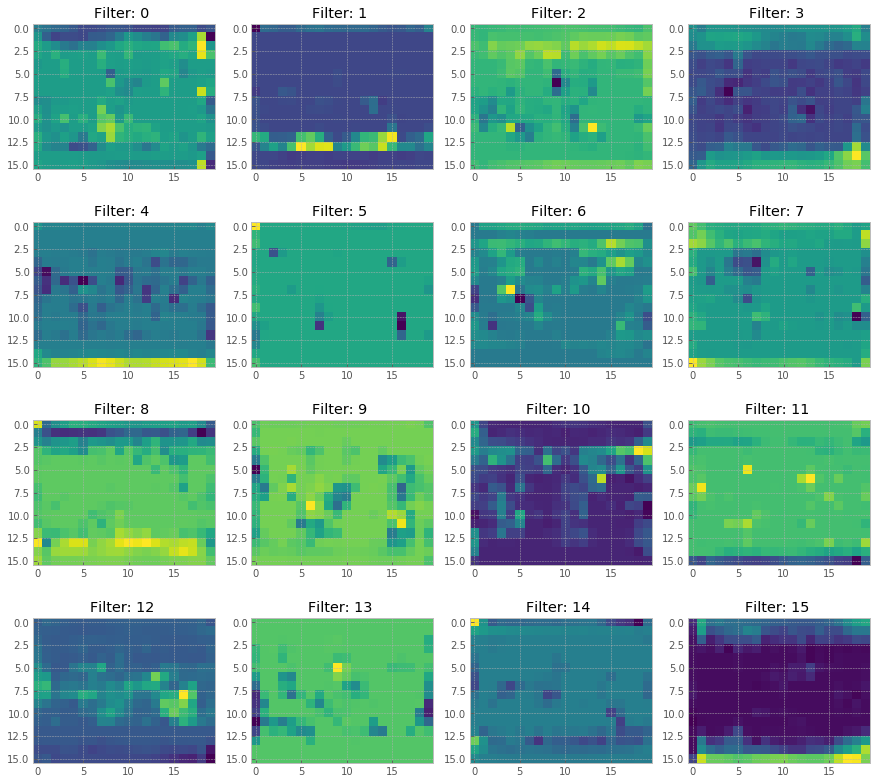

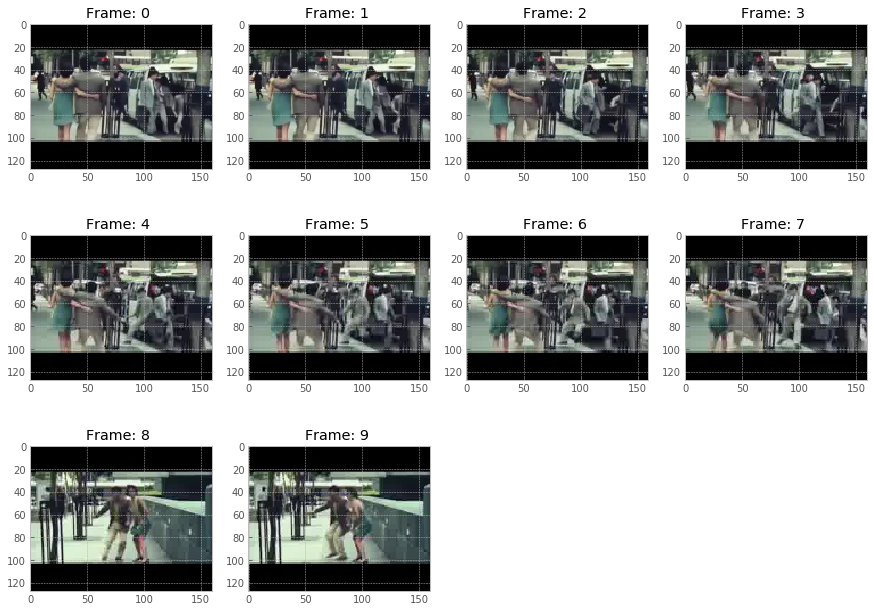

In [16]:
load_plot_representation('running', index=10, n_filters=16)
load_plot_frames(data_generator, 'running', index=10)